# Some Information About Our Dataset

## Title: Parkinsons Disease Data Set
## Abstract: Oxford Parkinson's Disease Detection Dataset

## ***Source*** 

#### The dataset was created by Max Little of the University of Oxford, in 
#### collaboration with the National Centre for Voice and Speech, Denver, 
#### Colorado, who recorded the speech signals. The original study published the 
#### feature extraction methods for general voice disorders.

> Attribute Information:

>>- MDVP:Fo(Hz)  ::: Average vocal fundamental frequency
>>- MDVP:Fhi(Hz) ::: Maximum vocal fundamental frequency
>>- MDVP:Flo(Hz) ::: Minimum vocal fundamental frequency
>>- MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP ::: Several measures of variation in fundamental frequency
>>- MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA ::: Several measures of variation in amplitude
>>- NHR, HNR ::: Two measures of ratio of noise to tonal components in the voice
>>- status ::: Health status of the subject (one) - Parkinson's & (zero) - healthy
>>- RPDE, D2 ::: Two nonlinear dynamical complexity measures
>>- DFA ::: Signal fractal scaling exponent
>>- spread1, spread2, PPE ::: Three nonlinear measures of fundamental frequency variation 

# Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Fpr NN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# For Fuzzy System
import skfuzzy as fuzz
from skfuzzy import control as ctrl

%matplotlib inline  

# Read Dataset

In [2]:
#### READ DATA ####
path = "parkinsons.csv"
data = pd.read_csv(path)
data =data.sample(frac=1,random_state=5).reset_index(drop=True)   #Shuffling Data

In [3]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S20_6,98.804,102.305,87.804,0.00432,0.00004,0.00247,0.00258,0.00742,0.02223,...,0.03831,0.00882,22.244,0.576644,0.772416,-6.025367,0.078202,2.053601,0.177275,1
1,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756,1
2,phon_R01_S43_3,113.715,116.443,96.913,0.00349,0.00003,0.00171,0.00203,0.00514,0.01472,...,0.02245,0.00478,26.547,0.380253,0.766700,-5.943501,0.192150,1.852542,0.179677,0
3,phon_R01_S06_5,155.358,227.383,80.055,0.00310,0.00002,0.00159,0.00176,0.00476,0.01718,...,0.02307,0.00677,25.970,0.470478,0.676258,-7.120925,0.279789,2.241742,0.108514,1
4,phon_R01_S43_6,116.388,129.038,108.970,0.00346,0.00003,0.00169,0.00213,0.00507,0.01725,...,0.02623,0.00415,26.143,0.361232,0.763242,-6.016891,0.109256,2.004719,0.174429,0


In [4]:
#Know Number Of Null Values
data.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
status              0
dtype: int64

In [5]:
#Get the count of each target (0 and 1) 
data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

# DEFINE DATA

In [6]:
data =  data.drop(columns=["name"], axis=1)

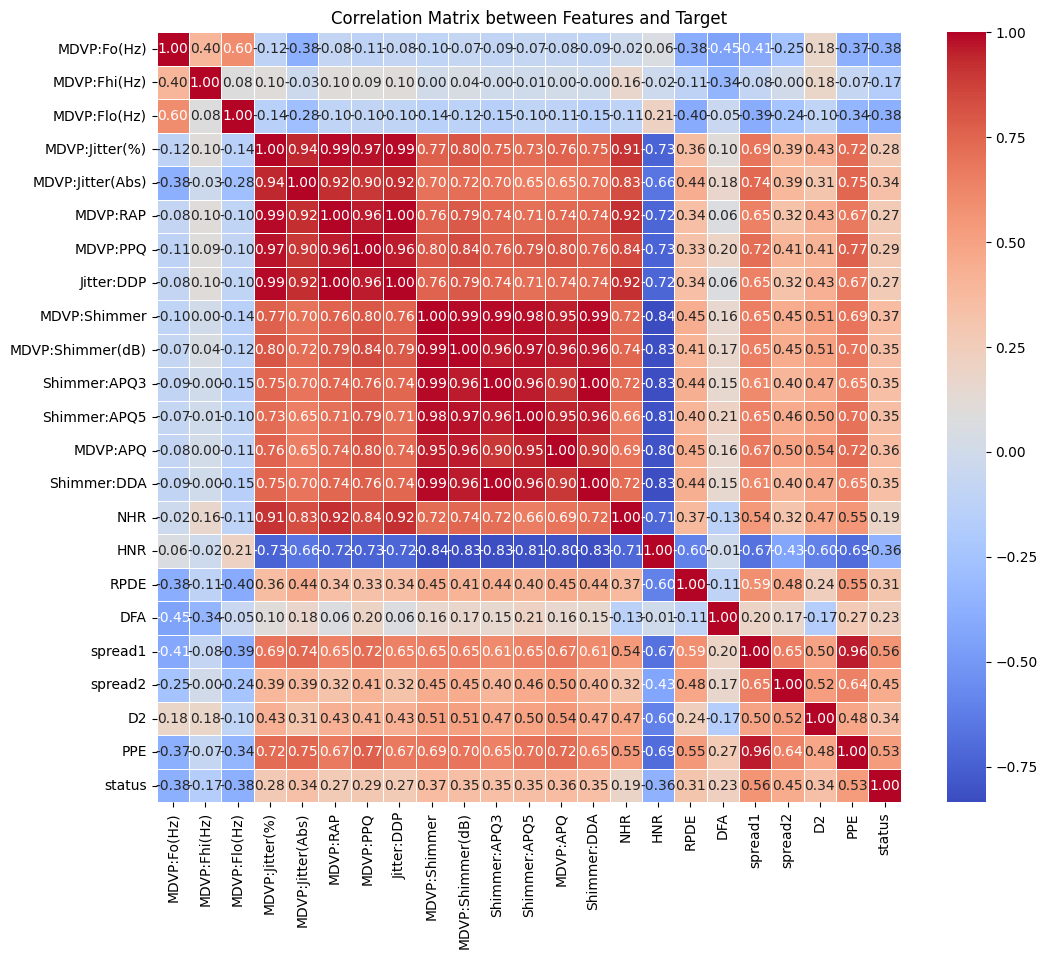

In [7]:
# رسم مصفوفة الانحدار
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix between Features and Target')
plt.show()

## Select Features

In [8]:
#### define features and target ####
features=np.array( data[['spread1', 'PPE']] ) 
target  =np.array( data["status"] )   # 1

print(f"Feature'shape {features.shape}")
print(f"Target'shape  {target.shape}"  )

Feature'shape (195, 2)
Target'shape  (195,)


## Scalling The Data  

In [9]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
SX=scale.fit_transform(features)
ST=target

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(SX, ST, test_size=0.3, shuffle=False)

In [11]:
X_train.shape

(136, 2)

In [12]:
y_train.shape

(136,)

In [13]:
max_values  = data[['spread1', 'PPE']].max()
min_values  = data[['spread1', 'PPE']].min()
mean_values = data[['spread1', 'PPE']].mean()
result_df   = pd.concat([max_values, min_values, mean_values], axis=1)
result_df.columns = ['Max', 'Min', 'Mean']

In [14]:
result_df

,Max,Min,Mean
spread1,-2.434031,-7.964984,-5.684397
PPE,0.527367,0.044539,0.206552


In [15]:
data[['spread1', 'PPE']].head(5)

,spread1,PPE
0,-6.025367,0.177275
1,-5.634322,0.211756
2,-5.943501,0.179677
3,-7.120925,0.108514
4,-6.016891,0.174429


In [16]:
data['status'].head(5)

0    1
1    1
2    0
3    1
4    0
Name: status, dtype: int64

## Create NN System

In [17]:
# Build the neural network
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape= (X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
4/4 [==============================] - 5s 470ms/step - loss: 0.6784 - accuracy: 0.7593 - val_loss: 0.6844 - val_accuracy: 0.5357
Epoch 2/10
4/4 [==============================] - 0s 27ms/step - loss: 0.6605 - accuracy: 0.7593 - val_loss: 0.6794 - val_accuracy: 0.5357
Epoch 3/10
4/4 [==============================] - 0s 33ms/step - loss: 0.6454 - accuracy: 0.7593 - val_loss: 0.6749 - val_accuracy: 0.5357
Epoch 4/10
4/4 [==============================] - 0s 40ms/step - loss: 0.6301 - accuracy: 0.7593 - val_loss: 0.6712 - val_accuracy: 0.5357
Epoch 5/10
4/4 [==============================] - 0s 40ms/step - loss: 0.6160 - accuracy: 0.7593 - val_loss: 0.6679 - val_accuracy: 0.5357
Epoch 6/10
4/4 [==============================] - 0s 38ms/step - loss: 0.6004 - accuracy: 0.7593 - val_loss: 0.6655 - val_accuracy: 0.5357
Epoch 7/10
4/4 [==============================] - 0s 31ms/step - loss: 0.5863 - accuracy: 0.7593 - val_loss: 0.6639 - val_accuracy: 0.5357
Epoch 8/10
4/4 [==========

In [18]:
# Evaluate the model on the test set
evaluation_result = model.evaluate(X_test, y_test)

# Extract and print the loss and accuracy
loss = evaluation_result[0]
accuracy = evaluation_result[1]

print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')

2/2 [==============================] - 0s 9ms/step - loss: 0.4846 - accuracy: 0.8475
Loss: 0.4846
Accuracy: 0.8475


In [23]:
# Make predictions on the new data
neural_network_output = model.predict(X_test)

neural_network_output[0]

2/2 [==============================] - 0s 3ms/step


array([0.6348951], dtype=float32)

## Create Fuzzy System

In [20]:
# Given values
min_value_spread1, max_value_spread1 = -7.964984, -2.434031
min_value_PEE, max_value_PPE = 0.044539, 0.527367
num_points = 100

In [21]:
# Define the fuzzy system
spread1 = ctrl.Antecedent(np.linspace(min_value_spread1, max_value_spread1, num_points), 'spread1')
PPE     = ctrl.Antecedent(np.linspace(min_value_PEE, max_value_PPE, num_points), 'PPE')

output_variable = ctrl.Consequent(np.arange(0, 11, 1), 'output_variable')

In [25]:
# Define the universe of discourse for input variables
spread1_universe = np.linspace(min_value_spread1, max_value_spread1, num_points)
PPE_universe = np.linspace(min_value_PEE, max_value_PPE, num_points)

# Create fuzzy sets for input variables
spread1_low = fuzz.trimf(spread1_universe, [min_value_spread1, min_value_spread1, (min_value_spread1 + max_value_spread1) / 2])
spread1_medium = fuzz.trimf(spread1_universe, [min_value_spread1, (min_value_spread1 + max_value_spread1) / 2, max_value_spread1])
spread1_high = fuzz.trimf(spread1_universe, [(min_value_spread1 + max_value_spread1) / 2, max_value_spread1, max_value_spread1])

PPE_low = fuzz.trimf(PPE_universe, [min_value_PEE, min_value_PEE, (min_value_PEE + max_value_PPE) / 2])
PPE_medium = fuzz.trimf(PPE_universe, [min_value_PEE, (min_value_PEE + max_value_PPE) / 2, max_value_PPE])
PPE_high = fuzz.trimf(PPE_universe, [(min_value_PEE + max_value_PPE) / 2, max_value_PPE, max_value_PPE])


### Set fuzzy membership functions ###

# Set fuzzy membership functions for Antecedents
spread1['low'] = fuzz.trimf(spread1.universe, [min_value_spread1, min_value_spread1, (min_value_spread1 + max_value_spread1) / 2])
spread1['medium'] = fuzz.trimf(spread1.universe, [min_value_spread1, (min_value_spread1 + max_value_spread1) / 2, max_value_spread1])
spread1['high'] = fuzz.trimf(spread1.universe, [(min_value_spread1 + max_value_spread1) / 2, max_value_spread1, max_value_spread1])

PPE['low'] = fuzz.trimf(PPE.universe, [min_value_PEE, min_value_PEE, (min_value_PEE + max_value_PPE) / 2])
PPE['medium'] = fuzz.trimf(PPE.universe, [min_value_PEE, (min_value_PEE + max_value_PPE) / 2, max_value_PPE])
PPE['high'] = fuzz.trimf(PPE.universe, [(min_value_PEE + max_value_PPE) / 2, max_value_PPE, max_value_PPE])


# Membership For Output
output_variable['low'] = fuzz.trimf(output_variable.universe, [0, 0, 5])
output_variable['medium'] = fuzz.trimf(output_variable.universe, [0, 5, 10])
output_variable['high'] = fuzz.trimf(output_variable.universe, [5, 10, 10])

# Set rules
rule1 = ctrl.Rule(spread1['low'] & PPE['low'], output_variable['low'])
rule2 = ctrl.Rule(spread1['medium'] & PPE['medium'], output_variable['medium'])
rule3 = ctrl.Rule(spread1['high'] & PPE['high'], output_variable['high'])

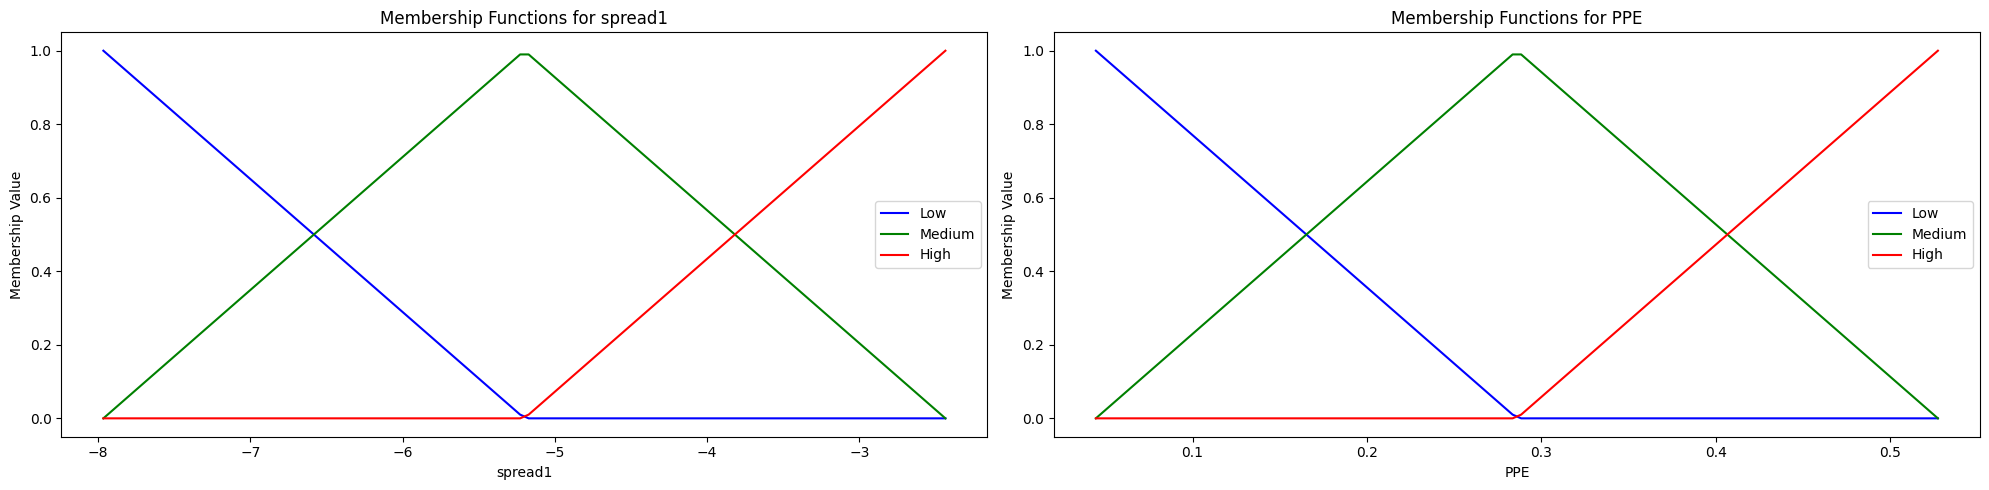

In [26]:
# Plotting spread1 membership functions
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.plot(spread1_universe, spread1_low, 'b', linewidth=1.5, label='Low')
plt.plot(spread1_universe, spread1_medium, 'g', linewidth=1.5, label='Medium')
plt.plot(spread1_universe, spread1_high, 'r', linewidth=1.5, label='High')
plt.title('Membership Functions for spread1')
plt.xlabel('spread1')
plt.ylabel('Membership Value')
plt.legend()

# Plotting PPE membership functions
plt.subplot(1, 2, 2)
plt.plot(PPE_universe, PPE_low, 'b', linewidth=1.5, label='Low')
plt.plot(PPE_universe, PPE_medium, 'g', linewidth=1.5, label='Medium')
plt.plot(PPE_universe, PPE_high, 'r', linewidth=1.5, label='High')
plt.title('Membership Functions for PPE')
plt.xlabel('PPE')
plt.ylabel('Membership Value')
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
# Build the fuzzy system
fuzzy_system = ctrl.ControlSystem([rule1, rule2, rule3])
fuzzy_model = ctrl.ControlSystemSimulation(fuzzy_system)

# Set input values
fuzzy_model.input['spread1'] = -2.434031
fuzzy_model.input['PPE'] = 0.527367

# Perform fuzzy inference
fuzzy_model.compute()

# Get the output result
fuzzy_output = fuzzy_model.output['output_variable']
print(f"Fuzzy System Output: {fuzzy_output}")

Fuzzy System Output: 8.333333333333334


## Now We Combined 2 Systems In One "**NeuroFuzzy System**"

In [28]:
neural_network_output0 =neural_network_output[0]
# Set the neural network output as input to the fuzzy system
fuzzy_model.input['spread1'] = neural_network_output0  
fuzzy_model.input['PPE']     = neural_network_output0 
# Perform fuzzy inference with the neural network output
fuzzy_model.compute()

# Get the fuzzy system output
fuzzy_output = fuzzy_model.output['output_variable']

# Combine the neural network and fuzzy system outputs 
combined_output = (neural_network_output[0] * 0.5) + (fuzzy_output * 0.5)

print(f"Neural Network Output: {neural_network_output0}")
print(f"Fuzzy System Output: {fuzzy_output}")
print(f"Combined Output: {combined_output}")

Neural Network Output: [0.6348951]
Fuzzy System Output: [8.33333329]
Combined Output: [4.48411419]


# END